# Horn Radio Telescope Spectra Plotting Usage Examples

### Glen Langston, 2021 September 16

In [1]:
# Import the Radio Astronomy Service (RAS) code.
import ras

In [2]:
#!pip3 install PyAstronomy
#import PyAstronomy

In [3]:
import rasnames

In [4]:
p = ras.Plot(verbose=False)

In [5]:
names = p.help("")

ras.help(flags): Plotting Inputs for telescope obs.
Usage: .help('<flags> <files>')
Where <flags> are:
-A optionally scale intensities by count of spectra averaged
-B <sample> Set first sample to plot (default is 1/4 of samples)
-BASE  Fit and remove a spectral baseline
-C optionally flag the center of the band
-E <sample> Set last sample to plot (default is end of samples)
-H optionally set the high velocity region for baseline fit
-I <integration time> Time (seconds) to average observations before plotting
-K <dir> optionally keep average hot and cold load calibration observations
-L optionally set the low velocity region for baseline fit
-N <number> optionally set the number of spectra to plot
-O <dir> optionally output intermediate, average files
-P <dir> write PNG and PDF files instead of showing plot
-Q optionally plot intensity versus freQuency, instead of velocity
-R optionally flag known RFI Lines
-S <filename> optionally set summary file name
-U optionally update reference fr

In [6]:
names = p.help("-R -C -I 600. -V data")
print(names)

Flagging RFI
Spectral integration time for averaging: 600.000000
['data']


In [7]:
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Velocity
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.6   1114.3    969.6   2160000
18:23:58 180.0,-40.0  301.2,-27.5   1135.4    985.8   2160000
18:37:04 180.0,-40.0  301.2,-27.4   1166.2   1010.8   2160000
18:50:11 180.0,-40.0  301.2,-27.3   1186.2   1028.7   2160000
19:06:02 180.0,-40.0  301.2,-27.2   1181.2   1024.9   1440000
19:19:09 180.0, 60.0   36.9, 10.8    507.8    424.3   2160000
19:32:15 180.0, 60.0   38.4,  7.9    504.6    423.6   2160000
19:45:22 180.0, 60.0   39.8,  5.0    496.3    420.9   2160000
19:58:28 180.0, 60.0   41.3,  2.1    486.2    418.5   2160000


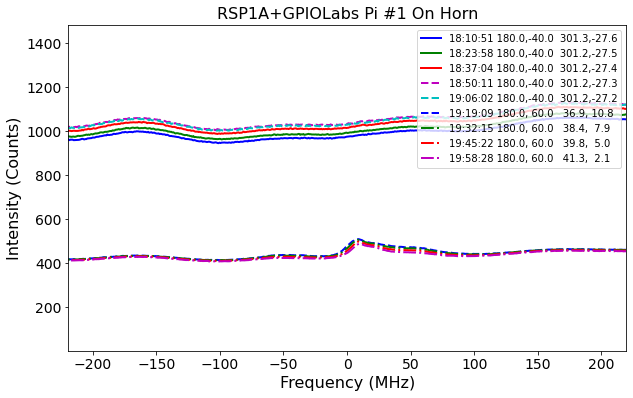

In [8]:
p.raw(files)

Starting Reading of Hot Load observations
Found  67 Hot load observations
Starting Reading of Cold observations
No high elevation data: can not calibrate
No Cold load files above minimum eleation     30.0 deg
And minimum Galactic Latitude:     30.0 deg
Min El:    200.0 deg and Min Glat:     90.0 deg
Median Receiver Temp:  213.62 +/- 10.20 (20.00  0.40) (K)
Ploting Intensity versus Velocity
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.6 312090.9 307453.4   2160000
18:23:58 180.0,-40.0  301.2,-27.5 315373.5 312735.8   2160000
18:37:04 180.0,-40.0  301.2,-27.4 321782.3 320709.7   2160000
18:50:11 180.0,-40.0  301.2,-27.3 327519.6 326273.4   2160000
19:06:02 180.0,-40.0  301.2,-27.2 326634.6 325049.0   1440000
19:19:09 180.0, 60.0   36.9, 10.8 217197.6 133973.6   2160000
19:32:15 180.0, 60.0   38.4,  7.9 216809.1 133719.5   2160000
19:45:22 180.0, 60.0   39.8,  5.0 216227.2 132876.2   2160000
19:58:28 180.0, 60.0   41.3,  2.1 216226.3 13215

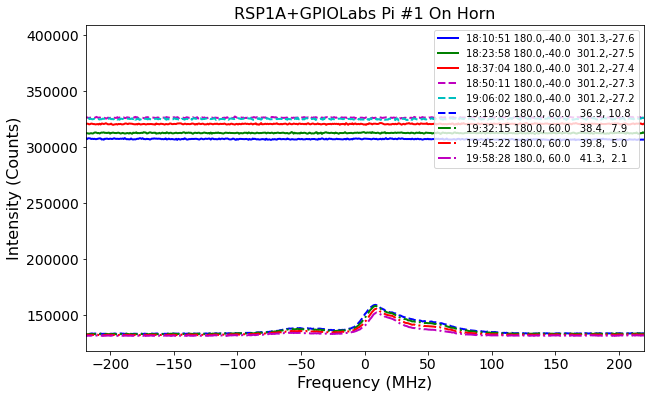

In [9]:
p.tsys(files)